In [143]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt

In [144]:
from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [151]:
X, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1,noise = 20, random_state = 2)

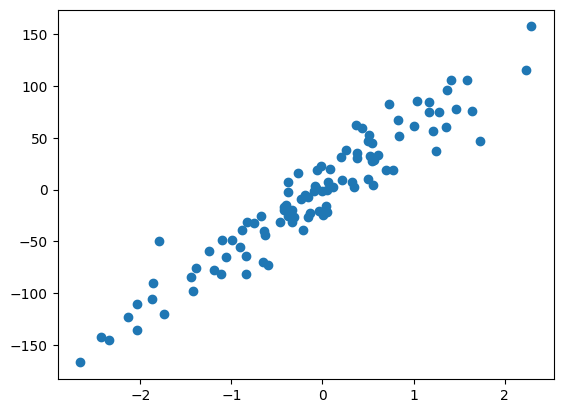

In [152]:
plt.scatter(X, y)
plt.show()

In [153]:
# split the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [154]:
# we fix the value of slope(m) for simplicity, so we calculate the slope(m) using OLS. 
lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

In [155]:
lr.coef_

array([58.85092863])

In [156]:
lr.intercept_

np.float64(1.4587736173147157)

In [157]:
# cvalculalte r2_score. 
r2_score(y_test, lr.predict(X_test))

0.8723215560499293

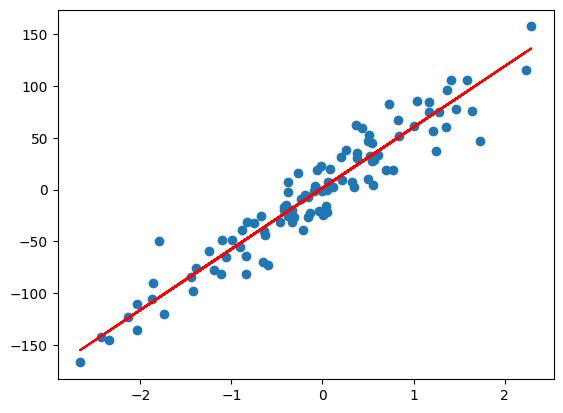

In [158]:
plt.scatter(X, y) 
plt.plot(X, lr.predict(X), color = 'red')

plt.show()

## Now we make the own Gradient Descent class that calculate the slope(m) and intercept(b).

In [188]:
class GDRegressor: 
    
    def __init__(self, learning_rate, epochs): 
        self.m = 100
        self.b = -120
        self.learning_rate = learning_rate
        self.epochs = epochs


    def fit(self, X_train, y_train): 

        for i in range(self.epochs):
            
            # calculate m and b using gradient descent. 
            slope_b = -2 * np.sum(y_train - self.m * X_train.ravel() - self.b)
            slope_m = -2 * np.sum((y_train - self.m * X_train.ravel() - self.b) * X_train.ravel())
            
            step_size_b = self.learning_rate * slope_b
            step_size_m = self.learning_rate * slope_m 

            self.b = self.b - step_size_b
            self.m = self.m - step_size_m
            
        print(self.m, self.b)

    def predict(self, X_test):
        y_pred = self.m * X_test.ravel() - self.b

        return y_pred

In [193]:
mygd = GDRegressor(0.001, 1000)

In [194]:
mygd.fit(X_train, y_train)

58.85092862784348 1.4587736173147086


In [195]:
# cvalculalte r2_score. 
r2_score(y_test, mygd.predict(X_test))

0.8786392060128302